# (N)on-(E)uclidean (U)pgrading
---
#### Description of NEU:
The NEU meta-algorithm learns a geometry for the input and (input $\times$ output) spaces by deforming them with a universal class of homeomorphisms + robustifies the involved loss functions to improve generalizability of the new and very flexible model.  
$$
\begin{aligned}
f \mapsto& \, \rho \circ f \circ \phi\\
\mathbb{E}_{\mathbb{P}}[\ell(f(X))] \mapsto & \,\max_{\mathbb{Q}\sim \mathbb{P}}\, \mathbb{E}_{\mathbb{Q}}[\ell(\rho(\phi(X), f\circ \phi(X)))].
\end{aligned}
$$
$\rho=\pi\circ \tilde{\rho}$, and $\tilde{\rho}$ and $\phi$ are "universal homeomorphisms" on $\operatorname{dom}(f)$ and on $\operatorname{dom}(f)\times \operatorname{co-dom}(f)$, respectively.  

---

---

#### Description of regression problem: 
In this notebook we implement the regression problem
$$
\begin{aligned}
y_i =&  \,f(x_i)\delta_i + \epsilon_i, \qquad i=1,\dots,N\\
\epsilon_i \sim &\, \mathcal{N}(0,\sigma),\\
\delta_i\sim &  \,U(1-D,1+D),
\end{aligned}
$$
for some *variance* $\sigma>0$ and *degree of model misspecification level* $0<D<1$.  
The quantity $\epsilon$ can be understood as, classical, additive noise while the quantity $\delta$ represents multiplicative noise.

---

---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [214]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


## Initialize Internal Variables/(Hyper)parameter(s)

## Check/Make Paths

In [215]:
Path('./outputs/models/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/GLd_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Invertible_Networks/Ed_Net/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/Benchmarks/Linear_Regression/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/').mkdir(parents=True, exist_ok=True)
Path('./outputs/models/NEU/Greedy_Initializations/Base_Regressor/').mkdir(parents=True, exist_ok=True)
Path('./outputs/tables/').mkdir(parents=True, exist_ok=True)
Path('./outputs/results/').mkdir(parents=True, exist_ok=True)
Path('./inputs/data/').mkdir(parents=True, exist_ok=True)

# Generate Training Data

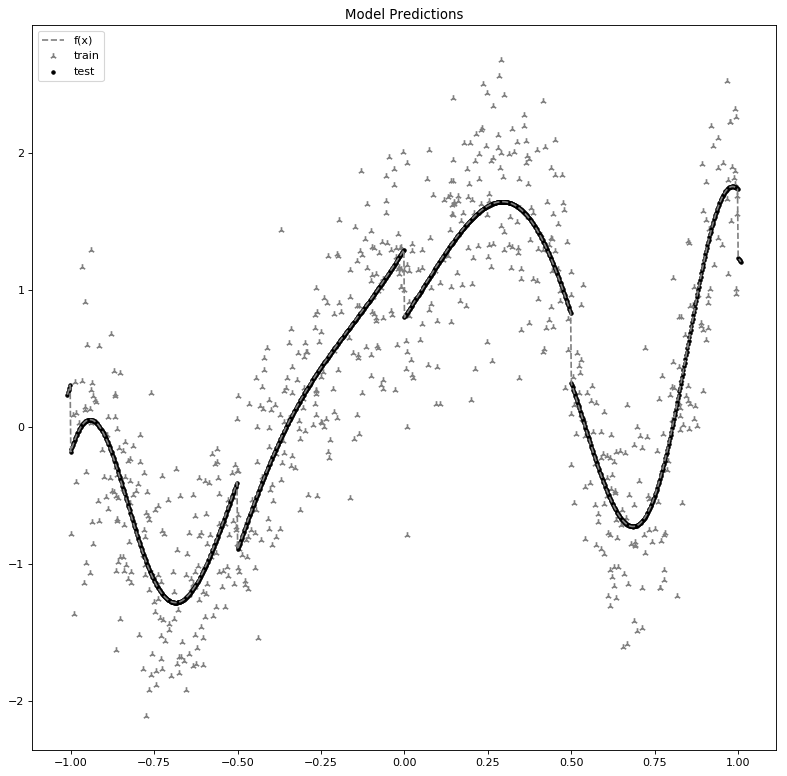

In [216]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
%run Data_Generator.ipynb

#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [228]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds =2, 
                                                 n_jobs = 3, 
                                                 n_iter = 1, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.9s finished


Epoch 1/200
47/47 [==============================] - 0s 1ms/step - loss: 0.8990 - mse: 1.1456 - mae: 0.8990 - mape: 139.6782
Epoch 2/200
47/47 [==============================] - 0s 1ms/step - loss: 0.8516 - mse: 1.0126 - mae: 0.8516 - mape: 204.8979
Epoch 3/200
47/47 [==============================] - 0s 1ms/step - loss: 0.8021 - mse: 0.9347 - mae: 0.8021 - mape: 319.6709
Epoch 4/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7892 - mse: 0.9094 - mae: 0.7892 - mape: 308.7056
Epoch 5/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7826 - mse: 0.8950 - mae: 0.7826 - mape: 322.0768
Epoch 6/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7750 - mse: 0.8852 - mae: 0.7750 - mape: 324.0137
Epoch 7/200
47/47 [==============================] - 0s 1ms/step - loss: 0.7710 - mse: 0.8934 - mae: 0.7710 - mape: 354.2804
Epoch 8/200
47/47 [==============================] - 0s 2ms/step - loss: 0.7663 - mse: 0.8658 - mae: 0.7663 - mape: 337.3351


47/47 [==============================] - 0s 2ms/step - loss: 0.5596 - mse: 0.4938 - mae: 0.5596 - mape: 331.4590
Epoch 67/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5615 - mse: 0.4951 - mae: 0.5615 - mape: 362.4587
Epoch 68/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5460 - mse: 0.4757 - mae: 0.5460 - mape: 282.2198
Epoch 69/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5511 - mse: 0.4844 - mae: 0.5511 - mape: 301.7587
Epoch 70/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5445 - mse: 0.4705 - mae: 0.5445 - mape: 310.5175
Epoch 71/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5465 - mse: 0.4755 - mae: 0.5465 - mape: 315.4576
Epoch 72/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5454 - mse: 0.4705 - mae: 0.5454 - mape: 320.5823
Epoch 73/200
47/47 [==============================] - 0s 2ms/step - loss: 0.5441 - mse: 0.4663 - mae: 0.5441 - mape: 288.5763
Epoch

47/47 [==============================] - 0s 1ms/step - loss: 0.5051 - mse: 0.4053 - mae: 0.5051 - mape: 302.9309
Epoch 131/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4972 - mse: 0.3830 - mae: 0.4972 - mape: 291.3227
Epoch 132/200
47/47 [==============================] - 0s 1ms/step - loss: 0.5070 - mse: 0.4046 - mae: 0.5070 - mape: 337.5745
Epoch 133/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4948 - mse: 0.3787 - mae: 0.4948 - mape: 278.3486
Epoch 134/200
47/47 [==============================] - 0s 951us/step - loss: 0.4950 - mse: 0.3819 - mae: 0.4950 - mape: 281.5166
Epoch 135/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4994 - mse: 0.3864 - mae: 0.4994 - mape: 349.7614
Epoch 136/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4920 - mse: 0.3760 - mae: 0.4920 - mape: 265.8878
Epoch 137/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4918 - mse: 0.3756 - mae: 0.4918 - mape: 301.8

47/47 [==============================] - 0s 2ms/step - loss: 0.4581 - mse: 0.3273 - mae: 0.4581 - mape: 294.0339
Epoch 195/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4627 - mse: 0.3333 - mae: 0.4627 - mape: 334.8716
Epoch 196/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4669 - mse: 0.3404 - mae: 0.4669 - mape: 280.5558
Epoch 197/200
47/47 [==============================] - 0s 980us/step - loss: 0.4555 - mse: 0.3255 - mae: 0.4555 - mape: 351.2319
Epoch 198/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4530 - mse: 0.3202 - mae: 0.4530 - mape: 345.3253
Epoch 199/200
47/47 [==============================] - 0s 1ms/step - loss: 0.4503 - mse: 0.3152 - mae: 0.4503 - mape: 333.7733
Epoch 200/200
64/64 [==============================] - 0s 648us/step
Benchmark-Model: Saving
Benchmark-Model: Saved


# Train NEU-ffNN

In [283]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# Load Hyper( and meta) parameter(s)
%run Helper_Functions.ipynb

Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!


In [284]:
tf.random.set_seed(2020)
print('Pre-trained benchmark model does not exist: Training.')
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN_test(n_folds =2, 
                                                          n_jobs = 3, 
                                                          n_iter = 1, 
                                                          param_grid_in = param_grid_NEU_Nets, 
                                                          X_train = data_x, 
                                                          y_train = data_y,
                                                          X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   20.0s finished


Epoch 1/200
47/47 [==============================] - 0s 7ms/step - loss: 0.9096 - mse: 1.1792 - mae: 0.9096 - mape: 166.1889
Epoch 2/200
23/47 [=============>................] - ETA: 0s - loss: 0.8672 - mse: 1.0686 - mae: 0.8672 - mape: 158.8705

InvalidArgumentError:  Input is not invertible.
	 [[node functional_117/fully_connected__dense__invertible_115/MatrixInverse (defined at <ipython-input-275-786c7efd1c6f>:30) ]] [Op:__inference_train_function_1968384]

Function call stack:
train_function


### Generate Plots - Visualization

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y.reshape(-1,),color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test.reshape(-1,),color='black',label='test', marker = '.')


# Plot Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')
# Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, color = 'blue',label='DNN_NEU')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Training - Set Predictions")
plt.show()

## Performance Report

In [ ]:
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

In [ ]:
# Run Univariate Regression File #
#--------------------------------#
%run Univariate_Regression_Benchmark_Models.ipynb

## Model Evaluation: 
*Record Error(s)/Prediction Quality*

Train results.

In [ ]:
# Train Set #
#-----------#
Vanilla = get_results(predictions_OLS_Benchmark,data_y)
NEU = get_results(NEU_OLS_prediction,data_y)
NEU_Gld = get_results(Deep_GLd_prediction,data_y)
NEU_Ed = get_results(Deep_Ed_prediction,data_y)
SSplines = get_results(f_hat_smoothing_splines_train,data_y)
LOESS = get_results(LOESS_prediction_train,data_y)

# Write to DataFrame
Results = pd.DataFrame({'Vanilla': Vanilla,
                             'NEU': NEU,
                             'NEU_GLd': NEU_Gld,
                             'NEU_Ed':NEU_Ed,
                             'Smoothing_Splines':SSplines,
                             'LOESS':LOESS},index={'MAE','MinE','MaxE','MSE','rMSE'})
# Format
Results = pd.DataFrame.transpose(Results)

# Write Results to file #
#-----------------------#
Results.to_latex('./outputs/results/Performance.txt')
# Write to Txt
cur_path = os.path.expanduser('./outputs/results/Performance_text.txt')
with open(cur_path, "w") as f:
    f.write(str(Results))

Test results.

In [ ]:
# Test Set #
#----------#
Vanilla = get_results(predictions_OLS_Benchmark_test,data_y_test)
NEU = get_results(NEU_OLS_prediction_test,data_y_test)
NEU_Gld = get_results(Deep_GLd_prediction_test,data_y_test)
NEU_Ed = get_results(Deep_Ed_prediction_test,data_y_test)
SSplines = get_results(f_hat_smoothing_splines_test,data_y_test)
LOESS = get_results(LOESS_prediction_test,data_y_test)

# Write to DataFrame
Results_test = pd.DataFrame({'Vanilla': Vanilla,
                             'NEU': NEU,
                             'NEU_GLd': NEU_Gld,
                             'NEU_Ed':NEU_Ed,
                             'Smoothing_Splines':SSplines,
                             'LOESS':LOESS},index={'MAE','MinE','MaxE','MSE','rMSE'})
# Format
Results_test = pd.DataFrame.transpose(Results_test)

# Write Results to file #
#-----------------------#
Results_test.to_latex('./outputs/results/Performance_test.txt')
# Write to Txt
cur_path = os.path.expanduser('./outputs/results/Performance_test_text.txt')
with open(cur_path, "w") as f:
    f.write(str(Results_test))

# Visualize Predictions

In [ ]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

# Plot Benchmark(s)
#------------------#
# Standard Benchmarks
plt.plot(np.array(data_x_test).reshape(-1,),(predictions_OLS_Benchmark_test), color = 'red', label='DNN')
# Plot Univariate Benchmark(s)
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')
# NEU Benchmarks: Alternatives to reconfigurations
plt.plot(np.array(data_x_test).reshape(-1,),Deep_GLd_prediction_test,color='lightblue',label='Deep-GLd')
plt.plot(np.array(data_x_test).reshape(-1,),Deep_Ed_prediction_test,color='orange',label='Deep-Ed')

# Plot NEU Regressors
# ---------------------------------- for INDEV  only: BEGIN --------------------------------------------------- #
# plt.plot(np.array(data_x_test).reshape(-1,),predictions_OLS_test[:,1], color = 'blue',label='DNN_NEU')
# plt.plot(np.array(data_x_test).reshape(-1,),(NEU_OLS_greedy_initializations_test[:,-1]), color = 'lightgreen',label='NEU-Reg-Init')
# ---------------------------------- for INDEV  only: END ----------------------------------------------------- #
plt.plot(np.array(data_x_test).reshape(-1,),(NEU_OLS_prediction_test), color = 'green',label='NEU-Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

# Report Results

In [ ]:
print('Train Results:')
Results.style.apply(lambda col: ['font-weight:bold' if x==col.min() else '' for x in col])

In [ ]:
print('Test Results:')
Results_test.style.apply(lambda col: ['font-weight:bold' if x==col.min() else '' for x in col])

#### The END

---